# Visualize Network

In the dike network model, nodes in the network (the graph G) represent different physical and policy elements of the flood protection system. Based on <span style="color:green"> **funs_generate_network.py** </span>, the nodes include:

1. Dike Nodes
    * Each dike is a node, with attributes loaded from <span style="color:green"> dikeIjssel.xlsx </span>.
    * These nodes have properties such as:
    * "f": fragility curve (probability of failure as a function of water level)
    * "dikelevel": current dike height
    * "r": stage-discharge relationship (rating curve)
    * "table": loss table (damage as a function of flood scenario)
    * "C1", "C2", "C3": Muskingum routing parameters
    * Other attributes from the Excel file (e.g., location, type, branch, etc.)
2. Room for the River Project Nodes
    * Nodes named like "RfR_projects {n}" for each planning step.
    * Represent possible flood mitigation projects.
    * Type: "measure"
3. Discount Rate Nodes
    * Nodes named like "discount rate {n}" for each planning step.
    * Store the discount rate for economic calculations.
4. Evacuation Policy Node
    * Node "EWS" (Early Warning System).
    * Contains evacuation policy information.
    * Type: "measure"

In [19]:
from funs_generate_network import get_network
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def simple_plot_dike_network(G):
    """Visualize the dike network graph."""
    pos = nx.spring_layout(G)  # You can use another layout if you have coordinates
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Dike Network")
    plt.show()

def plot_dike_network(G):
    """Visualize the dike network graph with nodes colored by type."""
    # Assume node attribute 'type' exists; otherwise, assign default type
    node_types = nx.get_node_attributes(G, 'type')
    unique_types = list(set(node_types.values())) if node_types else ['default']
    color_map = plt.get_cmap('tab10')
    type_to_color = {t: color_map(i) for i, t in enumerate(unique_types)}

    # Assign color to each node based on its type
    node_colors = []
    for node in G.nodes():
        t = node_types.get(node, 'default')
        node_colors.append(type_to_color.get(t, 'gray'))

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray')
    # Create legend
    for t in unique_types:
        plt.scatter([], [], color=type_to_color[t], label=t)
    if not node_types:
        plt.scatter([], [], color='gray', label='default')
    plt.legend(title='Node Type')
    plt.title("Dike Network")
    plt.show()

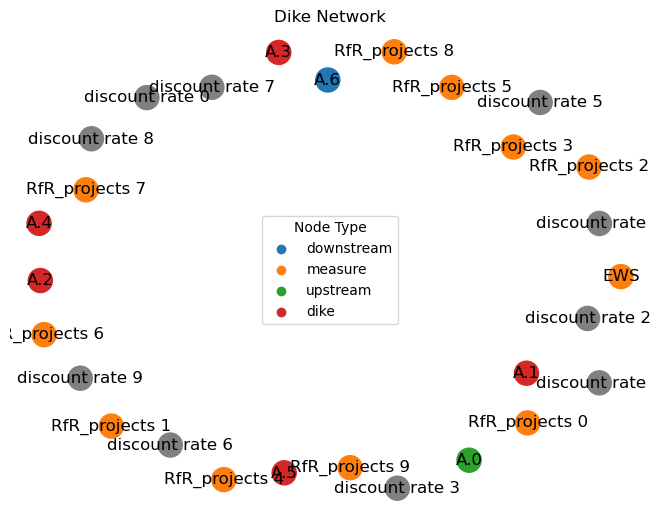

In [20]:
G, dike_list, dike_branches, steps = get_network()
plot_dike_network(G)

In [3]:
dike_list

array(['A.1', 'A.2', 'A.3', 'A.4', 'A.5'], dtype=object)

In [3]:
dike_branches

{'A': array(['A.1', 'A.2', 'A.3', 'A.4', 'A.5', 'A.6'], dtype=object)}

In [4]:
steps

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
def print_node_attributes(G, node_name):
    """Print all attributes for a specific node in the graph G."""
    if node_name in G.nodes:
        attrs = G.nodes[node_name]
        print(f"Node: {node_name}")
        for key, value in attrs.items():
            print(f"  {key}: {value}")
        print("-" * 40)
    else:
        print(f"Node '{node_name}' not found in the graph.")

print_node_attributes(G, 'A.1')

Node: A.1
  OBJECTID: 1
  prec_node: A.0
  km: 903
  branch: A
  type: dike
  dikelevel: 10.78903848004971
  hground: 9.5
  dike_ring: 49
  traject_id: 2
  c: 28.57
  b: 0.2
  lambda: 0.00336
  traj_ratio: 1
  f: [[1.17797852e+00 6.68000000e-20]
 [1.27797852e+00 6.68000000e-20]
 [1.37797852e+00 6.68000000e-20]
 [1.47797852e+00 6.68000000e-20]
 [1.57797852e+00 6.68000000e-20]
 [1.67797852e+00 6.68000000e-20]
 [1.77797852e+00 6.68000000e-20]
 [1.87797852e+00 6.68000000e-20]
 [1.97797852e+00 6.68000000e-20]
 [2.07797852e+00 6.68000000e-20]
 [2.17797852e+00 6.68000000e-20]
 [2.27797852e+00 6.68000000e-20]
 [2.37797852e+00 6.68000000e-20]
 [2.47797852e+00 6.68000000e-20]
 [2.57797852e+00 6.68000000e-20]
 [2.67797852e+00 6.68000000e-20]
 [2.77797852e+00 6.68000000e-20]
 [2.87797852e+00 6.68000000e-20]
 [2.97797852e+00 6.68000000e-20]
 [3.07797852e+00 6.68000000e-20]
 [3.17797852e+00 6.68000000e-20]
 [3.27797852e+00 6.68000000e-20]
 [3.37797852e+00 6.68000000e-20]
 [3.47797852e+00 6.68000000e

In [32]:
for node in G.nodes:
    print_node_attributes(G, node)

Node: A.0
  OBJECTID: 0
  prec_node: nan
  km: nan
  branch: nan
  type: upstream
  dikelevel: nan
  hground: nan
  dike_ring: nan
  traject_id: nan
  c: nan
  b: nan
  lambda: nan
  traj_ratio: nan
  Qevents_shape:            0         1         2         3         4         5         6   \
0    0.224895  0.214304  0.224283  0.230353  0.219234  0.203512  0.191063   
1    0.273724  0.264464  0.258063  0.282115  0.334478  0.382453  0.404076   
2    0.142807  0.111245  0.092054  0.084458  0.083052  0.084611  0.089789   
3    0.322389  0.291245  0.265126  0.243159  0.226207  0.221248  0.243066   
4    0.415504  0.401833  0.382493  0.366031  0.353424  0.342985  0.329513   
..        ...       ...       ...       ...       ...       ...       ...   
128  0.278171  0.379085  0.466318  0.510300  0.509764  0.480513  0.447139   
129  0.095764  0.093510  0.091621  0.089864  0.088082  0.086530  0.086463   
130  0.165290  0.176420  0.184651  0.188489  0.187010  0.182686  0.180664   
131  0.196609 